<h1>Project Description</h1><br>
The following project into one of the application of python -- Edge Detection. Refer to the following 
<a href = 'https://www.projectrhea.org/rhea/index.php/An_Implementation_of_Sobel_Edge_Detection'>link</a> for the theory behind sobel edge detection. Sobel edge detection is one of many edge detection technique in computer vision. For a comprehensive study on different edge detection technique, refer to the following <a href = 'http://aircconline.com/sipij/V4N3/4313sipij06.pdf'>article</a>. 

<h1>Import Necessary Libraries</h1>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image 

<h1>Helper Function</h1><br>
<h2>plot_image()</h2><br>
The following function plots an image for visualization purpose. As parameter, it takes in the image to be visualized, the color map being used for the image (greyscale vs color), and the title for the image that should be displayed. For a list of possible colormap, refer to the following <a href = 'https://matplotlib.org/tutorials/colors/colormaps.html'>link</a>.

In [2]:
def plot_image(image, color_map = None, title = None):
#     raise NotImplementedError    # delete this line to write the function
    plt.imshow(image, cmap = color_map)
    plt.title(title)
    plt.axis('off')
    plt.show()


<h2>to_grayscale()</h2><br>
The following function converts an RGB image to Grayscale image. As parameter, it takes in the image that needs to be converted to grayscale and returns the grayscale image as output. The idea behing grayscale is to set the Red, Green, and Blue component of a corresponding pixel equal the average of the component. For example, suppose for a given pixel, $Red = 50$, $Green = 100$, and $Blue = 150$ for the RGB image. This makes the average pixel value to be $\frac{50 + 100 + 150}{3} = 100$. This means, the pixel value for the corresponding grayscale image is: $Red = 100$, $Green = 100$, and $Blue = 100$.

In [3]:
def to_grayscale(image):
#     raise NotImplementedError    # delete this line to write the function

    height, width, _ = image.shape
    gray_image = np.zeros([height, width], dtype=np.uint8)
#     weights = [0.2989, 0.5870, 0.1140]
    for h in range(height):
        for w in range(width):
            r, g, b = image[h, w, :]
            avg = np.uint8((int(r) + int(g) + int(b)) / 3)
            gray_image[h, w] = avg
    return gray_image

<h2>convolution2d()</h2><br>
The following function perform the 2D convolution with the image and the kernel. As parameter, it takes the image and the kernel as the parameter and retuns the result of the 2D convolution as output. Refer to the animation below for demonstration of how 2D convolution works.
<img src = './media/convolution_gif2.gif' style="height:300px;">

In [4]:
def convolution2d(image, kernel):
#     raise NotImplementedError    # delete this line to write the function

    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                val = np.abs(np.sum(image[i:i+m, j:j+m]*kernel))
                new_image[i][j] = val
    return new_image

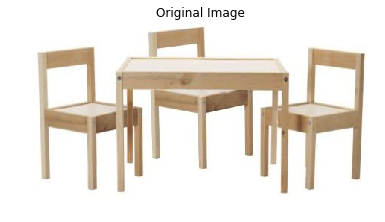

<class 'numpy.ndarray'>
(236, 450, 3)


In [5]:
IMAGE_PATH = "./media/image1.jpg"
im = Image.open(IMAGE_PATH)
im = np.asarray(im)
plot_image(im, title = "Original Image")
print(type(im))
print(im.shape)

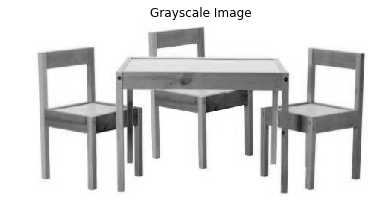

<class 'numpy.ndarray'>
(236, 450)


In [6]:
im_gray = to_grayscale(im)
plot_image(im_gray, color_map = 'gray', title = "Grayscale Image")
print(type(im_gray))
print(im_gray.shape)

Kernel = 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


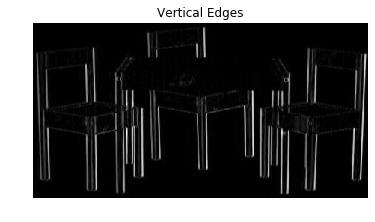

max edge =  589.0


In [7]:
vertical_kernel = np.asarray([[-1, 0, 1],[-2, 0, 2],[-1,0, 1]])
print("Kernel = \n", vertical_kernel)
vertical_edge = convolution2d(im_gray, vertical_kernel)
plot_image(vertical_edge, color_map = 'gray', title = "Vertical Edges")
print("max edge = ", np.max(vertical_edge))

Kernel = 
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


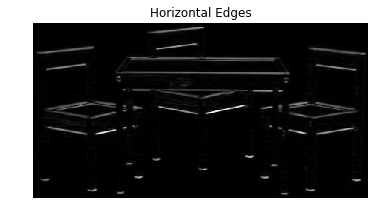

max edge =  677.0


In [8]:
horizontal_kernel = np.asarray([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
print("Kernel = \n", horizontal_kernel)
horizontal_edge = convolution2d(im_gray, horizontal_kernel)
plot_image(horizontal_edge, color_map = 'gray', title = "Horizontal Edges")
print("max edge = ", np.max(horizontal_edge))

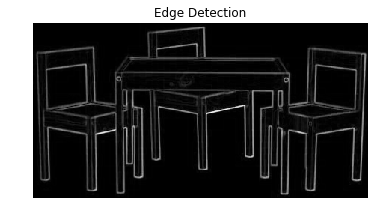

In [9]:
combine_edge = horizontal_edge + vertical_edge
plot_image(combine_edge, color_map = 'gray', title = "Edge Detection")